# AI Seminar Final Project
## Kepler Data

In [25]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error

## Make heatmap corelation matrix
kepler = pd.read_csv("cumulative.csv")
kep = pd.read_csv("cumulative.csv")
c = kepler.corr()
s = c.unstack()
#so = s.order(kind="quicksort")
#print(so)

In [26]:
kepler = kepler.drop(['kepoi_name','kepler_name','koi_pdisposition', 'koi_tce_delivname','koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec'], axis = 1)
kepler = kepler.drop(['koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact_err1', 'koi_impact_err2', \
 'koi_duration_err1', 'koi_duration_err2', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad_err1', 'koi_prad_err2', \
 'koi_teq_err1', 'koi_teq_err2', 'koi_insol_err1', 'koi_insol_err2','koi_steff_err1', 'koi_steff_err2', \
 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad_err1', 'koi_srad_err2', 'koi_tce_plnt_num'], axis = 1)

In [27]:
kepler.isnull().sum()
#kepler[kepler['koi_impact'].isnull() | kepler['koi_depth'].isnull() |kepler['koi_prad'].isnull() \
#       |kepler['koi_teq'].isnull() |kepler['koi_insol'].isnull() |kepler['koi_model_snr'].isnull() \
#       |kepler['koi_tce_plnt_num'].isnull() |kepler['koi_steff'].isnull() |kepler['koi_slogg'].isnull() \
#       |kepler['koi_srad'].isnull() ]

rowid                0
kepid                0
koi_disposition      0
koi_period           0
koi_time0bk          0
koi_impact         363
koi_duration         0
koi_depth          363
koi_prad           363
koi_teq            363
koi_insol          321
koi_model_snr      363
koi_steff          363
koi_slogg          363
koi_srad           363
ra                   0
dec                  0
koi_kepmag           1
dtype: int64

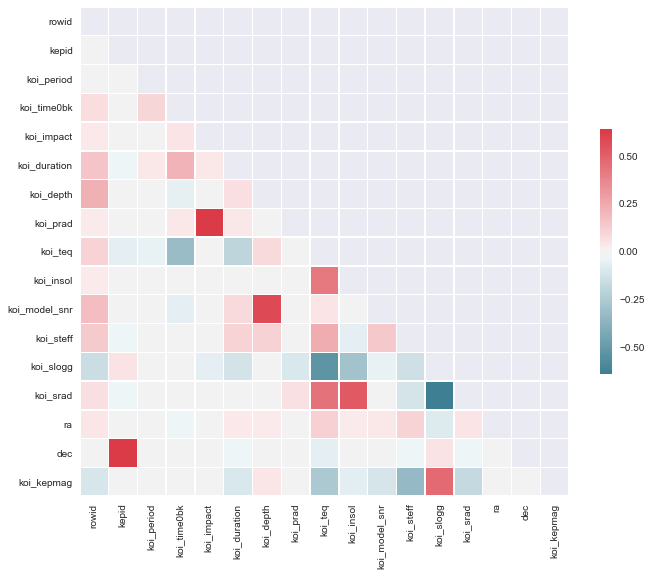

In [28]:
#kepler.koi_disposition = kepler.koi_disposition.map({'FALSE POSITIVE':0, 'CONFIRMED':1, 'CANDIDATE':2})
kepler_disp = pd.get_dummies(kepler['koi_disposition'])
newKep = pd.concat([kepler, kepler_disp], axis = 1)
newKep
#kepler.koi_pdisposition = kepler.koi_pdisposition.map({'FALSE POSITIVE':0, 'CANDIDATE':1})
#kepler.info()
#kepler.koi_disposition.dtype
#print(kepler.koi_disposition)

import seaborn as sns
c = kepler.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(c, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(c, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [29]:
newKep.CANDIDATE
cand = kepler.loc[kepler['koi_disposition'] != 'CANDIDATE']
print(len(cand), len(kepler))

#print(cand)
#for i in range(0, len(newKep)):
 #   if (newKep['CANDIDATE'][i] = 1):
#        newKep = newKep.drop(newKep.CANDIDATE[i], axis = 0)

7316 9564


In [42]:
cand = cand.dropna(axis = 0, how="any")
cand.isnull().sum()
cand.koi_disposition.dtype
cand.to_csv('cand.csv')

In [31]:
X = cand.select_dtypes(include=[object])
X.head(3)
from sklearn import preprocessing
X.columns

# LabelEncoder()
le = preprocessing.LabelEncoder()
X_2 = X.apply(le.fit_transform)
cand['koi_disposition'] = X_2['koi_disposition']

In [32]:
X = cand.drop(['koi_disposition','rowid', 'kepid'], axis = 1)
y = cand.koi_disposition

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
print(len(X_test))

1403


In [33]:
classification_tree_kepler = DecisionTreeClassifier(max_depth = 4)
fit = classification_tree_kepler.fit(X_train, y_train)
score = classification_tree_kepler.score(X_train, y_train)
print(fit)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


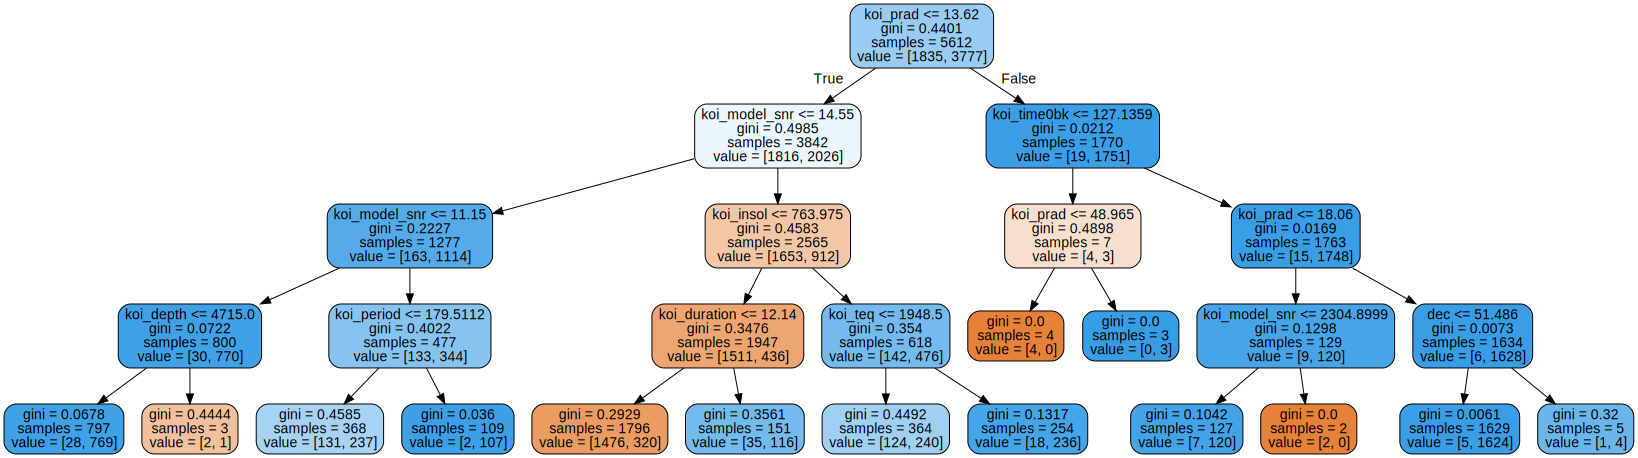

In [34]:
export_graphviz(classification_tree_kepler, 
                out_file = "kepler_tree.dot", 
                feature_names = X_train.columns, filled = True, rounded=True)

with open("kepler_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [35]:
pred = classification_tree_kepler.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, 
                  index = ['FALSE POSITIVE', 'CONFIRMED'], 
                  columns = ['FALSE POSITIVE', 'CONFIRMED'])
print(cm)
accuracy = (361+827)/(361+92+82+827)
print(accuracy)

                FALSE POSITIVE  CONFIRMED
FALSE POSITIVE             367         74
CONFIRMED                   90        872
0.8722466960352423


In [36]:
cand2 = kepler.loc[kepler['koi_disposition'] == 'CANDIDATE']
cand2 = cand2.dropna(axis = 0, how="any")
cand2pred = cand2.drop(['koi_disposition','rowid','kepid'], axis=1)

pred = classification_tree_kepler.predict(cand2pred)


#mse = mean_squared_error(y_test, pred)
#sqMSE = np.sqrt(mse)
#print("MSE ==> ", mse, "MSE Squared ==> ", sqMSE)
print(pred)

cand2['predicted'] = pred

cand2.to_csv('cand2.csv')

[0 0 1 ..., 1 1 1]


## Random Forest

In [37]:
X = cand.drop(['koi_disposition','rowid', 'kepid'], axis = 1)
y = cand.koi_disposition

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
random_forest_movie = RandomForestRegressor(n_estimators = 100, max_features = 4, random_state = 1)

random_forest_movie.fit(X_train, y_train)

pred = random_forest_movie.predict(X_test)
mean_squared_error(y_test, pred)

0.060884746970776907

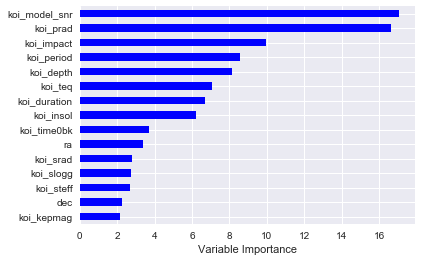

In [38]:
Importance = pd.DataFrame({'Importance':random_forest_movie.feature_importances_*100}, 
                          index = X.columns)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'b', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.savefig("randomForest.png")

[ 1.    1.    0.02 ...,  0.68  0.31  0.23]


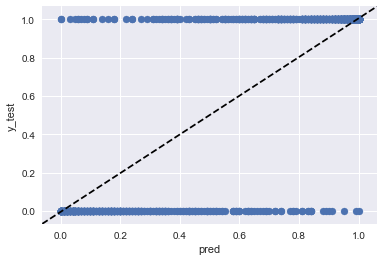

In [39]:
pred = random_forest_movie.predict(X_test)

plt.scatter(pred, 
            y_test, 
            label = 'medv')

plt.plot([0, 1], 
         [0, 1], 
         '--k', 
         transform = plt.gca().transAxes)

plt.xlabel('pred')
plt.ylabel('y_test')

mean_squared_error(y_test, pred)
print(pred)

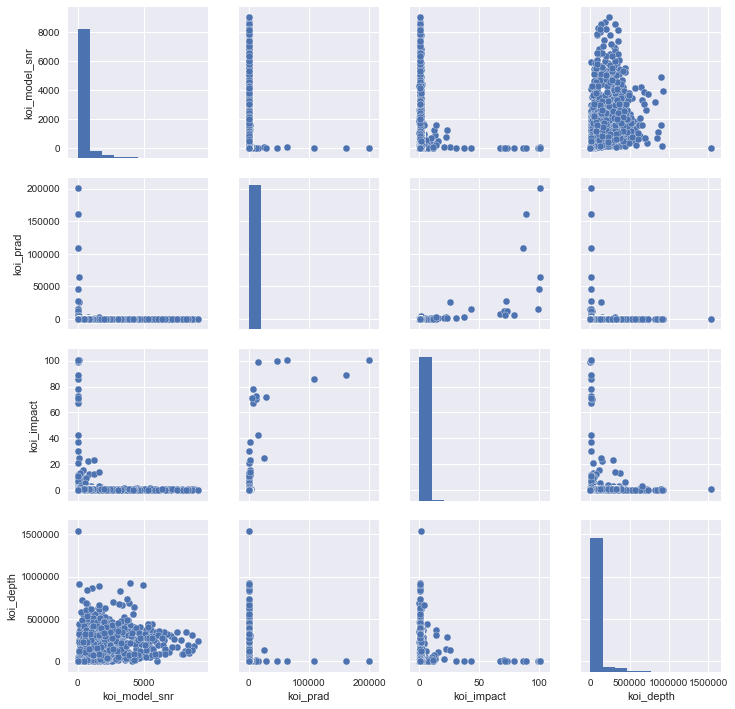

In [40]:
import seaborn as sns
sns_plot = sns.pairplot(cand[['koi_model_snr','koi_prad', 'koi_impact', 'koi_depth']])
sns_plot.savefig("pairPlot.png")